# MNIST Analysis
The MNIST data files can be downloaded from [this website](http://yann.lecun.com/exdb/mnist/). One little detail: the data files are in the `.idx` format. Fortunately, there is a Python utility we can use to convert the data to `numpy` arrays: the `idx2numpy` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import idx2numpy

In [2]:
train_images = idx2numpy.convert_from_file('./data/train-images-idx3-ubyte/train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('./data/train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('./data/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('./data/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

In [3]:
norm_train_images = train_images/255

In [22]:
# Turning the labels into NN outputs
train_labels_vec = np.zeros((len(train_labels), 10))
for i, label in enumerate(train_labels):
    train_labels_vec[i, label] = 1

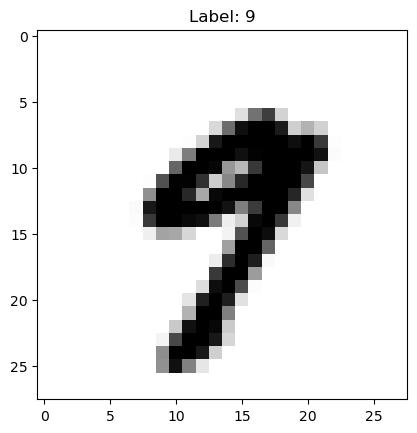

In [7]:
# I want to be able to visualize the images
i = 20
plt.imshow(test_images[i], cmap='gray_r')
plt.title(f"Label: {test_labels[i]}")
plt.show()

Now, we can start defining a model. In the MNIST website, there is a table with different models and scores. Let's use one of them: the 2-layer NN, 300 hidden units, mean square error. The reported test error rate of 4.9%.

In [23]:
input_layer = keras.Input(shape=(28,28), name='Input')
flatten_layer = keras.layers.Flatten(name='Flatten')
hidden_layer = keras.layers.Dense(300, activation='relu', name='hidden')
out_layer = keras.layers.Dense(10, name='out')
model = keras.Sequential([input_layer, flatten_layer, hidden_layer, out_layer], name='MNIST_classifier')
model.summary()
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)

Model: "MNIST_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 300)               235500    
                                                                 
 out (Dense)                 (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


We can now train the model on the training data:

In [24]:
model.fit(
    x=norm_train_images,
    y=train_labels_vec,
    batch_size=30,
    epochs=10,
)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0174
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0096
Epoch 3/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0081
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0072
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0066
Epoch 6/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0061
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0057
Epoch 8/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0054
Epoch 9/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 10/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0049


Time to make some predictions!

In [26]:
def model_prediction(model, image):
    model_raw_output = model(np.array([image])).numpy()
    normalized_output = (model_raw_output - np.amin(model_raw_output))/(np.amax(model_raw_output) - np.amin(model_raw_output))
    predicted_value = np.argmax(normalized_output)
    return predicted_value


In [28]:
count = 0
for test_image, test_label in zip(test_images, test_labels):
    if model_prediction(model, test_image) == test_label:
        count += 1

acc = count/len(test_labels)
print(f'Test accuracy: {acc:.3f}')

Test accuracy: 0.978


Pretty good! Can we improve this result? Let's train some more...

In [29]:
model.fit(
    x=norm_train_images,
    y=train_labels_vec,
    batch_size=30,
    epochs=30,
)

Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0047
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0042
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 6/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 7/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 8/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 9/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0037
Epoch 10/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 11/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0035
Epoch 12/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0035
E

In [30]:
count = 0
for test_image, test_label in zip(test_images, test_labels):
    if model_prediction(model, test_image) == test_label:
        count += 1

acc = count/len(test_labels)
print(f'Test accuracy: {acc:.3f}')

Test accuracy: 0.974


Further training actually WORSENED our results! This is a clear sign of overfitting. Let's train some more and see.

In [31]:
model.fit(
    x=norm_train_images,
    y=train_labels_vec,
    batch_size=30,
    epochs=60,
)

Epoch 1/60
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 2/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0026
Epoch 3/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 4/60
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0025
Epoch 5/60
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0025
Epoch 6/60
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 7/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 8/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 9/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 10/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 11/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 12/60
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0023


In [32]:
count = 0
for test_image, test_label in zip(test_images, test_labels):
    if model_prediction(model, test_image) == test_label:
        count += 1

acc = count/len(test_labels)
print(f'Test accuracy: {acc:.3f}')

Test accuracy: 0.954


Clearly overfitting! How do we prevent overfitting? Regularization!

In [53]:
input_layer = keras.Input(shape=(28,28), name='Input')
flatten_layer = keras.layers.Flatten(name='Flatten')
hidden_layer = keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=9e-5), name='hidden')
out_layer = keras.layers.Dense(10, name='out')
model = keras.Sequential([input_layer, flatten_layer, hidden_layer, out_layer], name='MNIST_classifier')
model.summary()
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)

Model: "MNIST_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 300)               235500    
                                                                 
 out (Dense)                 (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


We can also do some learning rate decay

In [59]:
def learning_decay(epoch, learning_rate):
    if epoch != 0 and epoch % 8 == 0:
        return learning_rate/3
    else:
        return learning_rate
learning_scheduler = keras.callbacks.LearningRateScheduler(learning_decay)

In [60]:
model.fit(
    x=norm_train_images,
    y=train_labels_vec,
    batch_size=30,
    epochs=15,
    callbacks=[learning_scheduler]
)

Epoch 1/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 2/15
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 3/15
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 4/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 5/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 6/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 7/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 8/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0109 - lr: 1.2346e-05
Epoch 9/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0108 - lr: 4.1152e-06
Epoch 10/15
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0108 - lr: 4.1152e-06

In [61]:
count = 0
for test_image, test_label in zip(test_images, test_labels):
    if model_prediction(model, test_image) == test_label:
        count += 1

acc = count/len(test_labels)
print(f'Test accuracy: {acc:.3f}')

Test accuracy: 0.934
